In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_abc2f642b8b24a62b596c6fe7372f591 = ibm_boto3.client(service_name='****',
    ibm_api_key_id='****',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_abc2f642b8b24a62b596c6fe7372f591.get_object(Bucket='****',Key='****')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_311 = pd.read_csv(body)
df_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-02-19T20:24:04.000,45649037,HEAT/HOT WATER,11209.0,9511 SHORE ROAD,SHORE ROAD,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.616370,-74.038267,NaN,RESIDENTIAL BUILDING,Open
1,2020-02-19T08:47:18.000,45652275,HEAT/HOT WATER,10458.0,116 EAST MOSHOLU PARKWAY SOUTH,EAST MOSHOLU PARKWAY SOUTH,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.876177,-73.883521,NaN,RESIDENTIAL BUILDING,Open
2,2020-02-19T15:21:09.000,45652211,DOOR/WINDOW,10453.0,1808 CEDAR AVENUE,CEDAR AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.852653,-73.920212,NaN,RESIDENTIAL BUILDING,Open
3,2020-02-19T20:05:38.000,45652289,HEAT/HOT WATER,10034.0,252 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.866148,-73.919071,NaN,RESIDENTIAL BUILDING,Open
4,2020-02-19T20:53:12.000,45648600,HEAT/HOT WATER,10463.0,231 WEST 230 STREET,WEST 230 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.877587,-73.907309,NaN,RESIDENTIAL BUILDING,Open


Cleaning data

In [3]:
df_311 = df_311.dropna()
df_311.dtypes

created_date               object
unique_key                  int64
complaint_type             object
incident_zip              float64
incident_address           object
street_name                object
address_type               object
city                       object
resolution_description     object
borough                    object
latitude                  float64
longitude                 float64
closed_date                object
location_type              object
status                     object
dtype: object

In [4]:
#Fixing data types
df_311['created_date'] = pd.to_datetime(df_311['created_date'])
df_311['closed_date'] = pd.to_datetime(df_311['closed_date'])
df_311['incident_zip'] = df_311['incident_zip'].astype(int).astype('category')
df_311['incident_address'] = df_311['incident_address'].astype('category')
df_311['street_name'] = df_311['street_name'].astype('category')
df_311['address_type'] = df_311['address_type'].astype('category')
df_311['borough'] = df_311['borough'].astype('category')
df_311['location_type'] = df_311['location_type'].astype('category')
df_311['status'] = df_311['status'].astype('category')

df_311.dtypes

created_date              datetime64[ns]
unique_key                         int64
complaint_type                    object
incident_zip                    category
incident_address                category
street_name                     category
address_type                    category
city                              object
resolution_description            object
borough                         category
latitude                         float64
longitude                        float64
closed_date               datetime64[ns]
location_type                   category
status                          category
dtype: object

In [5]:
#Since the question asks to consider complaints created till 31st Dec 2018, the dataset is modified accordingly
df_311 = df_311[df_311['created_date'] < pd.datetime(2019,1,1)]

print(df_311['complaint_type'].value_counts().head(8))

#To find most the top (most frequent) complaint type
top_complaint = df_311['complaint_type'].mode()

print('The top (most frequent) complaint type is ' + top_complaint[0])

HEAT/HOT WATER          1013656
HEATING                  864826
PLUMBING                 648102
GENERAL CONSTRUCTION     471047
UNSANITARY CONDITION     389734
PAINT - PLASTER          339440
PAINT/PLASTER            309961
ELECTRIC                 280570
Name: complaint_type, dtype: int64
The top (most frequent) complaint type is HEAT/HOT WATER


Taking data relevant to complaint type identified in Question 1

In [6]:
#Making a dataframe of the top complaint type complaints for easier analysis
df_top_comp = pd.concat([df_311[df_311['complaint_type'] == 'HEATING'], df_311[df_311['complaint_type'] == 'HEAT/HOT WATER']])

df_top_comp.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
176609,2012-04-15,23060277,HEATING,10034,97 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,More than one complaint was received for this ...,MANHATTAN,40.863805,-73.925358,2012-04-19,RESIDENTIAL BUILDING,Closed
176610,2012-04-14,23059409,HEATING,10025,914 COLUMBUS AVENUE,COLUMBUS AVENUE,ADDRESS,NEW YORK,More than one complaint was received for this ...,MANHATTAN,40.798371,-73.963517,2012-04-20,RESIDENTIAL BUILDING,Closed
176611,2012-04-14,23059006,HEATING,10034,97 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,More than one complaint was received for this ...,MANHATTAN,40.863805,-73.925358,2012-04-19,RESIDENTIAL BUILDING,Closed
176613,2012-04-13,23051271,HEATING,10034,97 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.863805,-73.925358,2012-04-19,RESIDENTIAL BUILDING,Closed
176614,2012-04-11,23042619,HEATING,11378,52-15 65 PLACE,65 PLACE,ADDRESS,MASPETH,More than one complaint was received for this ...,QUEENS,40.732983,-73.900081,2012-04-18,RESIDENTIAL BUILDING,Closed


In [7]:
df_top_comp['borough'].unique()

[MANHATTAN, QUEENS, BRONX, BROOKLYN, STATEN ISLAND, Unspecified]
Categories (6, object): [MANHATTAN, QUEENS, BRONX, BROOKLYN, STATEN ISLAND, Unspecified]

In [8]:
#Cleaning data by dropping rows with the borough unspecified
df_top_comp.drop(df_top_comp[df_top_comp['borough'] == 'Unspecified'].index, inplace = True)
df_top_comp.reset_index(drop=True, inplace=True)
df_top_comp['borough'].unique()

[MANHATTAN, QUEENS, BRONX, BROOKLYN, STATEN ISLAND]
Categories (5, object): [MANHATTAN, QUEENS, BRONX, BROOKLYN, STATEN ISLAND]

In [9]:
#Checking if there is inavlid data in any of the columns
df_top_comp.isna().sum()

created_date              0
unique_key                0
complaint_type            0
incident_zip              0
incident_address          0
street_name               0
address_type              0
city                      0
resolution_description    0
borough                   0
latitude                  0
longitude                 0
closed_date               0
location_type             0
status                    0
dtype: int64

Finding locations/regions with maximum number of complaints reported 

In [10]:
#Sorting by address
address_count = df_top_comp.groupby(['incident_address'])['unique_key'].count()

address_count.sort_values(ascending = False).head(5)

incident_address
34 ARDEN STREET             11995
89-21 ELMHURST AVENUE        7922
3810 BAILEY AVENUE           7085
1025 BOYNTON AVENUE          5739
2090 EAST TREMONT AVENUE     3651
Name: unique_key, dtype: int64

In [11]:
#Sorting by ZIP code
df_top_comp.groupby(['incident_zip'])['unique_key'].\
            count().sort_values(ascending = False).\
            head(5)

incident_zip
11226    50783
10458    49633
10467    49594
10468    43802
10453    43085
Name: unique_key, dtype: int64

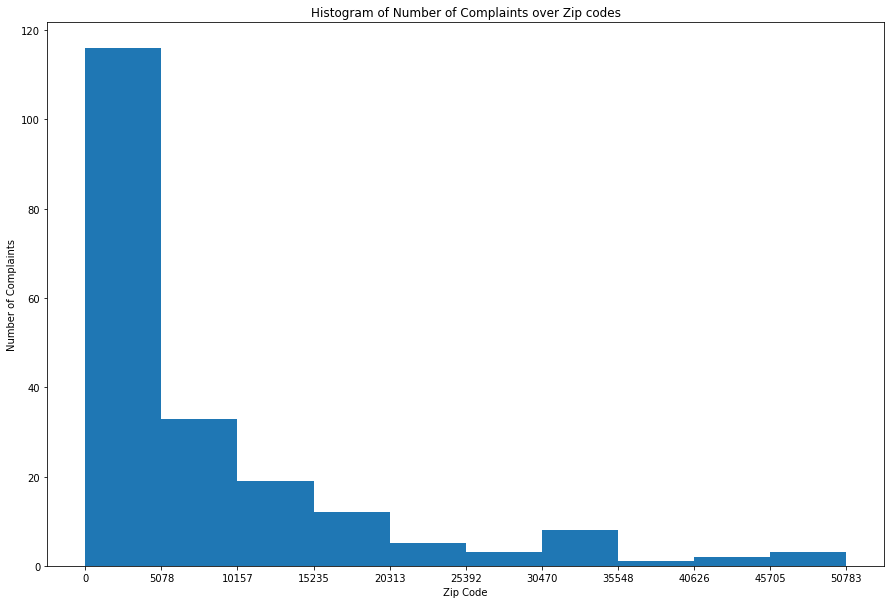

In [21]:
#visualizing the data in a histogram

data = df_top_comp.groupby(['incident_zip'])['unique_key'].count()

count, bin_edges = np.histogram(data)

data.plot(kind='hist', figsize=(15, 10), xticks=bin_edges)

plt.title('Histogram of Number of Complaints over Zip codes') # add a title to the histogram
plt.ylabel('Number of Complaints') # add y-label
plt.xlabel('Zip Code') # add x-label

plt.show()

In [22]:
#Sorting by address given a ZIP code
df_top_comp.groupby(['incident_zip', 'incident_address'])['unique_key'].\
            count().sort_values(ascending = False).\
            head(5)

incident_zip  incident_address        
10040         34 ARDEN STREET             11995
11373         89-21 ELMHURST AVENUE        7922
10463         3810 BAILEY AVENUE           7085
10472         1025 BOYNTON AVENUE          5739
10462         2090 EAST TREMONT AVENUE     3651
Name: unique_key, dtype: int64

In [23]:
#Sorting by street
df_top_comp.groupby(['street_name'])['unique_key'].\
            count().sort_values(ascending = False).\
            head(5)

street_name
GRAND CONCOURSE    28657
BROADWAY           18920
OCEAN AVENUE       13681
ARDEN STREET       13182
MORRIS AVENUE      12461
Name: unique_key, dtype: int64

In [24]:
#Sorting by street for a given zip code
df_top_comp.groupby(['street_name', 'incident_zip'])['unique_key'].\
            count().sort_values(ascending = False).\
            head(5)

street_name      incident_zip
ARDEN STREET     10040           13182
BOYNTON AVENUE   10472            9242
BAILEY AVENUE    10463            8935
ELMHURST AVENUE  11373            8541
GRAND CONCOURSE  10451            7115
Name: unique_key, dtype: int64

In [25]:
#Sorting by borough
df_top_comp.groupby(['borough'])['unique_key'].\
            count().sort_values(ascending = False).\
            head(5)

borough
BRONX            518873
BROOKLYN         496132
MANHATTAN        362725
QUEENS           206737
STATEN ISLAND     15772
Name: unique_key, dtype: int64

Text(0.5, 0, 'Borough')

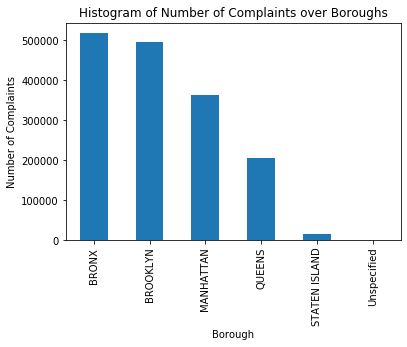

In [27]:
#Visualizing the data
df_top_comp.groupby(['borough'])['unique_key'].\
            count().plot(kind  = 'bar')

plt.title('Histogram of Number of Complaints over Boroughs') # add a title to the histogram
plt.ylabel('Number of Complaints') # add y-label
plt.xlabel('Borough') # add x-label

Visulaizing the data over a map

In [28]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [29]:
#grouping data by zip code
df_top_comp_by_ZIP = df_top_comp.groupby(['incident_zip'])

latitude_list = df_top_comp_by_ZIP['latitude'].mean() #getting latitude for a given zip code
longitude_list = df_top_comp_by_ZIP['longitude'].mean() #getting longitude for a given zip code
no_of_complaints = df_top_comp_by_ZIP['unique_key'].count() #getting the number of complaints for a given zip code

df_incidents = pd.DataFrame({'no_of_complaints':no_of_complaints, 
                            'latitude': latitude_list, 'longitude': longitude_list})

In [30]:
#cleaning data
df_incidents = df_incidents.dropna()

In [31]:
zip_codes = df_incidents.axes[0].values.astype(str)  #Getting a list of zip codes 
Rmax = no_of_complaints.max() #Max number of complaints for a zip code

In [33]:
#Getting latitude and longitude values for the city of NYC
longitude = df_incidents['longitude'].mean()
latitude = df_incidents['latitude'].mean()

# Initializing map of NYC
NYC_map = folium.Map(location = [latitude, longitude], zoom_start = 10)

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the zip codes, plotting larger circles if the number of complaints associated with the zip code is larger
for lat, lng, label, in zip(df_incidents.latitude, df_incidents.longitude, zip_codes):
    incident = df_incidents[df_incidents.latitude == lat]
    r = incident['no_of_complaints']
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=10*r[0]/Rmax, #*r/Rmax, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
# add incidents to map
NYC_map.add_child(incidents)

Question: 

    Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

Answer:
    
    The concentration of The complaint type identified in question 1 (complaints related to heating/hot water) with respect to the zip code is shown on a map  

    If the choice is based on:

    Street:
        'GRAND CONCOURSE' and 'BROADWAY' have a higher number of complaints for the top complaint type

    Zip Code:
        Zip code 11226 has the highest complaint number for the top complaint type
        Also of note are zip codes 10467 and 10468 both have a high complaint number, so that area could benefit from attention

    Borough:
        'BRONX' and 'BROOKLYN' have a higher complaint number for the top complaint type
        
Additional Note:
        
     While I am not particularly familiar with the population distributions in the city of new york, I'd think that these two boroughs, Bronx and Brooklyn, are densely populated regions with the buildings getting old, which could lead to complaints with heating especially in the winters